In [29]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
# Read the City and Ride Data
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data_to_load, city_data_to_load, how="left", on="city")

# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

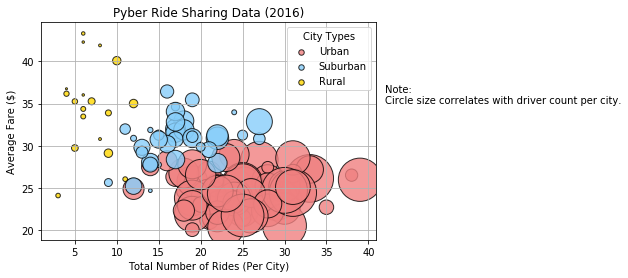

In [30]:
# Obtain the x and y coordinates for each of the three city types
combined_data["Bubble Color"] = np.where(combined_data["type"] == "Urban", "LightCoral",
                                         (np.where(combined_data["type"] == "Suburban", "LightSkyBlue", "Gold"))) 

xandy_coordinates_df = combined_data.groupby(["city","type","Bubble Color"]).agg({"fare":["mean"], "ride_id":["count"], "driver_count":["sum"]})
xandy_coordinates_df.columns = ["Average Fare($)", "Total Number of Rides(Per City)", "Total Number of Drivers(Per City)"]

average_fare_per_city = xandy_coordinates_df["Average Fare($)"]
total_number_rides_per_city = xandy_coordinates_df["Total Number of Rides(Per City)"]
total_number_drivers_per_city = xandy_coordinates_df["Total Number of Drivers(Per City)"]
xandy_groupby_df = pd.DataFrame(list(xandy_coordinates_df.index.values))
bubble_color = xandy_groupby_df[2]
city_type = xandy_groupby_df[1]

# Build the scatter plots for each city types
unique_bubble_colors = list(xandy_groupby_df[2].unique()) #['LightCoral', 'LightSkyBlue', 'Gold']
unique_city_types = list(xandy_groupby_df[1].unique())    #['Urban', 'Suburban', 'Rural']

for i, u in enumerate(unique_city_types):
    total_number_rides_per_cityi = [total_number_rides_per_city[j] for j in range(len(total_number_rides_per_city)) if city_type[j] == u]
    average_fare_per_cityi = [average_fare_per_city[j] for j in range(len(total_number_rides_per_city)) if city_type[j] == u]
    total_number_drivers_per_cityi = [total_number_drivers_per_city[j] for j in range(len(total_number_rides_per_city)) if city_type[j] == u]
   
    plt.scatter(total_number_rides_per_cityi, average_fare_per_cityi, total_number_drivers_per_cityi, marker="o", alpha=0.8, facecolor=unique_bubble_colors[i], edgecolors="black", linewidth=1, label=str(u))

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgd = plt.legend(title="City Types")
for handle in lgd.legendHandles:
       handle.set_sizes([30.0])

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig("images/pyber_ride_sharing_data.png")

# Show plot
plt.show()

## Total Fares by City Type

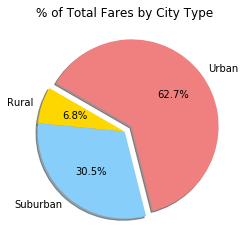

In [31]:
# Calculate Type Percents
total_fares_city_type = combined_data.groupby(["type"])["fare"].sum()
labels = list(total_fares_city_type.index.values)
colors = ["Gold", "LightSkyBlue", "LightCoral"]
explode = (0,0,0.1)

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(total_fares_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("images/total_fares_by_city_type.png")

# Show Figure
plt.show()

## Total Rides by City Type

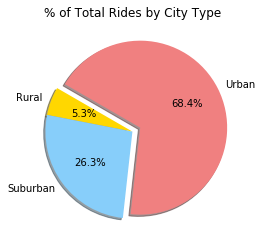

In [32]:
# Calculate Ride Percents
total_rides_city_type = combined_data.groupby(["type"])["ride_id"].count()

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(total_rides_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("images/total_rides_by_city_type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

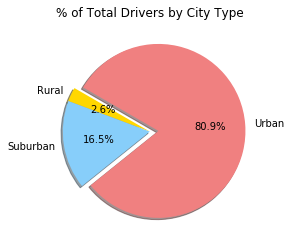

In [33]:
# Calculate Driver Percents
total_drivers_city_type = city_data_to_load.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers_city_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig("images/total_drivers_by_city_type.png")

# Show Figure
plt.show()